In [1]:
"""Import all packages that will be used"""
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
"""Classes"""
class Element:
    def __init__(self,ele):
        self.element=ele
        self.info="ICP-MS Elements: "+self.element
        self.author="yyan"
        #----Load results-------
        self.filename="sample.xlsx"
        #self.linuxpath='/home/purity/Desktop/Data'
        #self.winpath='C:\\Users\\yyan\\Documents\\Data\\ICPMS\\Alldata'
        self.macpath='/Users/wallepro/yunqi/Purity/Data/ICPMS/Alldata'
        self.filepath=join(self.macpath,self.filename)
        #Loading all sample info (not needed for now)
        #self.df_sample=pd.read_excel(self.filepath,sheetname="sample",parse_cols="A:H")
        #Load all elements data
        self.df_elements=pd.read_excel(self.filepath,sheet_name="sample",usecols="J:AM")
        #Get only one element data
        self.data=self.df_elements[self.element]

    def scatter(self):
        #data=self.df_elements[self.element]
        num_data=self.data.index.values
        return plt.scatter(num_data,self.data)
    
    def histogram(self,binval=None):
        #data=self.df_elements[self.element]
        binval = binval
        return plt.hist(self.data,bins=binval)
    
    def mean(self):
        return self.data.mean()
    
    def quantile(self,val=None):
        val=val or 0.5
        return self.data.quantile(val)
    
    def convert(self):
        return self.data
        
    def zero(self):
        return (self.data==0).any()
    
    def total(self):
        return len(self.data)
    
    def numzero(self):
        nozerodata=self.data[self.data>0]
        return len(self.data)-len(nozerodata)
        
"""Now, we want to explore Element Iron"""
#---Define 'iron' as Element Class-----
iron=Element('Fe')

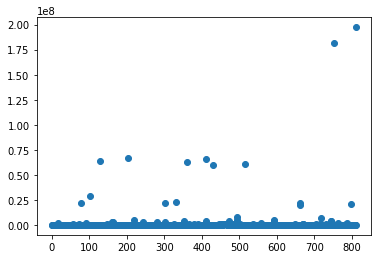

In [6]:
#---Scater plot of 'iron' e.g. the Fe element in the data set-----
iron.scatter()

(array([798.,   7.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.00000000e+00, 1.97349472e+07, 3.94698944e+07, 5.92048417e+07,
        7.89397889e+07, 9.86747361e+07, 1.18409683e+08, 1.38144631e+08,
        1.57879578e+08, 1.77614525e+08, 1.97349472e+08]),
 <a list of 10 Patch objects>)

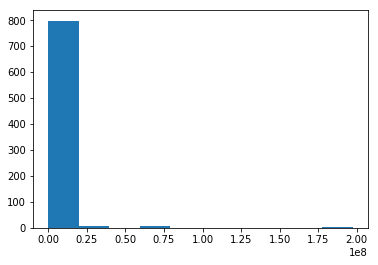

In [7]:
#---Histogram of iron element------
iron.histogram()

In [8]:
#---Mean value of all iron elements------
iron_mean=iron.mean()
print(iron_mean)

1298331.1273648618


In [9]:
#---Median vaolue of iron elements-----
iron_median=iron.quantile()#---default is 50% quantile
print(iron_median)

20812.6595462743


In [11]:
#---25% of iron element----
iron_25=iron.quantile(val=0.25)
print(iron_25)

3210.86347704362


In [12]:
#---90% quantile of iron element----
iron_90=iron.quantile(val=0.90)
print(iron_90)

333933.2694126723


In [13]:
#---Total number of iron element tests----
iron.total()

813